In [25]:
#import necessary libraries

#for importing data and wrangling
import pandas as pd
import numpy as np

#for plotting images & adjusting colors
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image


In [26]:
# read in the data
df = pd.read_csv("/Users/ben/Desktop/DSI_GA_Materials/capstone/Capstone_Project_backup/Data/sampled_test_hand_labeled.csv")

df.head()

,Unnamed: 0,text,label
0,0,militants engaged former officials hamid karza...,1
1,1,american spirit gets lebanese makeover beirut ...,1
2,2,pleasant protest tyranny workplace productivit...,1
3,3,see latest charts maps coronavirus cases death...,0
4,4,biden administration said measures would degra...,1


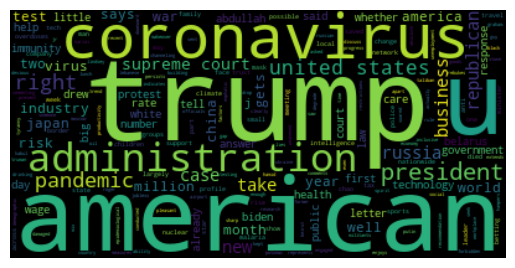

In [27]:
# filtered wordart of most biased buzzwords
texts = df[df.label==1].text.tolist() 

# join the list and lowercase all the words
texts = ' '.join(texts).lower()

#create the wordcloud object
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(texts)

# plot the WordCloud object
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

# Save the biased words WordCloud
wordcloud_biased_file = "biased_words.png"
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig(wordcloud_biased_file)

In [28]:
# create a dictionary of word frequencies
text_dictionary = wordcloud.process_text(texts)
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq=wordcloud.words_

#print results
print(list(word_freq.items())[:5])
print(list(rel_freq.items())[:5])

[('trump', 12), ('american', 9), ('u', 9), ('coronavirus', 7), ('administration', 6)]
[('trump', 1.0), ('american', 0.75), ('u', 0.75), ('coronavirus', 0.5833333333333334), ('administration', 0.5)]


In [29]:
# Create a list of speakers and responses
speakers = df['label'].unique()
corpus = [' '.join(df[df['label'] == speaker]['text'].tolist()) for speaker in speakers]

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate a CountVectorizer object
# Utilize the new STOP_WORDS list
cv = CountVectorizer(stop_words='english', ngram_range=(1, 3))

# Fit-transform our text and create a DataFrame with the result
X = cv.fit_transform(corpus)
X = X.toarray()

bow = pd.DataFrame(X, columns=cv.get_feature_names_out())
bow.index = speakers

In [30]:
bow

,abadi,abadi said,abadi said happy,abdicates,abdicates fight,abdicates fight soul,abdullah,abdullah abdullah,abdullah abdullah moscow,abdullah moscow,...,year,year court,year court overlooked,year exceeding,year exceeding number,year new,year new study,yes,yes coronavirus,yes coronavirus transmitted
1,1,1,1,1,1,1,2,1,1,1,...,3,1,1,1,1,1,1,1,1,1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


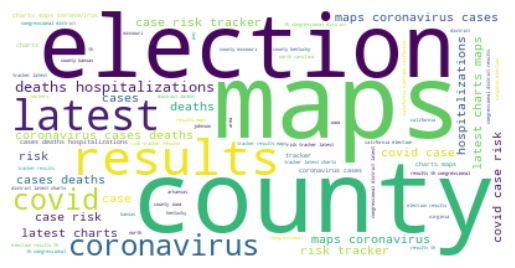

In [31]:
# Filter word art of unbiased headlines/article contents
row_index = 0
row_data = bow.loc[row_index].sort_values(ascending=False)

# Create a dictionary from the row data
row_dict = row_data.to_dict()

# Create the WordCloud object
wordcloud = WordCloud(min_word_length=3, background_color='white')

# Generate the word cloud
wordcloud.generate_from_frequencies(row_dict)

# Plot the word cloud
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

# Save the biased words WordCloud
wordcloud_unbiased_file = "unbiased_words.png"
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig(wordcloud_unbiased_file)